# Sparse Categorical Cross-entropy Chapter 7 Workshop 3 

In [1]:
import torch

# Check if PyTorch is installed
print("PyTorch version:", torch.__version__)

# Check if CUDA (GPU) is available
print("CUDA available:", torch.cuda.is_available())

# If CUDA is available, print details
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
    print("Device count:", torch.cuda.device_count())
    print("Current device:", torch.cuda.current_device())

PyTorch version: 2.7.1+cu118
CUDA available: True
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU
Device count: 1
Current device: 0


## Load module

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Create load dataset and plotting

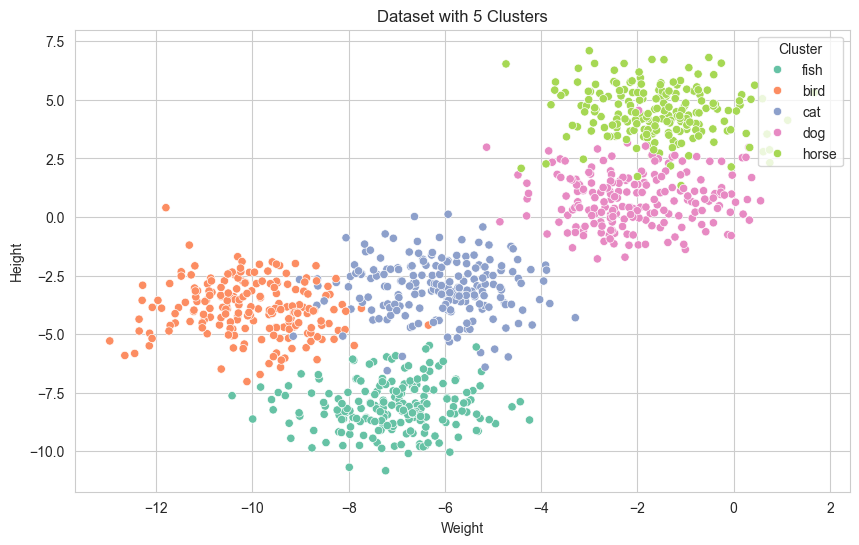

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a dataset with 5 clusters
# with 1000 samples and 2 features
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1 
                  , random_state=1)

X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])
df = pd.concat([X_df, y_df], axis=1)

target_map = {
    0: 'horse',
    1: 'bird',
    2: 'fish',
    3: 'cat',
    4: 'dog'
}

# Map the labels to animal names
df['class'] = df['class'].map(target_map)

# Plot the dataset
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='height', hue='class', palette='Set2')
plt.title('Dataset with 5 Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [3]:
class_names, y = np.unique(df['class'], return_inverse=True)
print(class_names)
print(y)

['bird' 'cat' 'dog' 'fish' 'horse']
[3 0 1 1 2 2 3 2 2 2 2 4 4 1 0 1 4 2 2 0 1 2 1 4 1 3 1 2 0 1 0 3 3 1 4 2 0
 0 1 0 3 4 4 4 2 1 3 0 3 2 1 3 0 2 0 1 0 1 4 0 2 0 1 4 4 2 0 4 4 2 0 3 1 2
 1 3 3 2 1 0 3 1 2 0 2 2 4 3 3 4 0 3 3 2 4 4 2 1 2 4 3 4 2 2 1 1 4 1 4 1 4
 1 3 1 4 3 3 4 0 4 0 3 2 4 3 2 1 2 4 2 3 4 2 0 2 1 2 0 1 3 1 3 0 0 0 3 0 1
 2 0 0 1 4 2 4 1 4 0 0 2 2 3 1 0 4 0 2 1 4 0 3 2 1 1 3 3 0 3 1 2 0 3 0 1 0
 0 1 4 1 1 3 4 4 1 3 2 0 4 0 0 4 3 1 1 1 3 2 1 1 4 0 4 2 4 0 0 3 1 3 4 3 4
 3 1 3 2 4 1 4 3 0 0 0 0 2 0 4 2 4 3 2 4 4 3 2 4 4 3 1 0 0 4 3 2 0 4 0 3 0
 4 3 1 4 1 0 2 0 3 3 3 3 1 4 2 1 2 1 4 4 3 0 3 4 3 4 0 1 1 4 1 3 2 1 4 4 0
 2 4 1 3 2 4 3 0 3 3 3 3 1 0 0 1 0 0 4 4 1 2 2 4 1 1 0 3 4 4 1 2 0 2 0 1 2
 2 1 3 1 4 3 4 3 0 0 2 4 1 2 3 2 2 1 3 2 0 2 2 3 1 4 1 3 1 2 0 2 2 3 3 1 1
 3 3 2 0 0 1 4 4 4 3 2 2 4 3 3 3 2 0 1 2 0 4 1 4 0 4 2 1 3 1 3 2 1 1 2 1 3
 2 3 1 4 3 2 0 1 2 1 3 4 0 1 3 2 1 0 4 4 0 2 1 4 0 0 0 1 1 2 4 1 1 3 2 0 2
 2 3 4 2 4 3 4 1 2 3 1 3 4 0 3 1 4 2 3 2 4 0 3 1 3 2 4 3 3 3 3 3

## Prepare Data

### Prepare feature X with Standard Scalar

In [5]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352],
       [ 1.04534643,  0.78033742]])

### Split Train and Test data

In [19]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
# Split the dataset into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size=0.25, 
                                                    random_state=1)
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# 2. Wrap in TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [55]:
print("Training data shape:", X_train_tensor.shape)
print("Testing data shape:", X_test_tensor.shape)

print("Training labels shape:", y_train_tensor.shape)
print("Testing labels shape:", y_test_tensor.shape)

print("Number of training batches:", len(train_loader))
print("Number of testing batches:", len(test_loader))

print("train_dataset type: ", type(train_dataset))
print("train_loader type: ", type(train_loader))

print("train_dataset element number:", len(train_dataset))
print("train_loader batch number:", len(train_loader))

print("train_dataset[0] type: ", type(train_dataset[0]))
print("train_loader[0] type: ", type(train_loader.dataset[0]))
print("train_dataset[0] element number:", len(train_dataset[0]))
print("train_loader[0] element number:", len(train_loader.dataset[0]))
print("train_dataset[0]: ", train_dataset[0])
print("train_loader batch size: ", train_loader.batch_size)

Training data shape: torch.Size([750, 2])
Testing data shape: torch.Size([250, 2])
Training labels shape: torch.Size([750])
Testing labels shape: torch.Size([250])
Number of training batches: 24
Number of testing batches: 8
train_dataset type:  <class 'torch.utils.data.dataset.TensorDataset'>
train_loader type:  <class 'torch.utils.data.dataloader.DataLoader'>
train_dataset element number: 750
train_loader batch number: 24
train_dataset[0] type:  <class 'tuple'>
train_loader[0] type:  <class 'tuple'>
train_dataset[0] element number: 2
train_loader[0] element number: 2
train_dataset[0]:  (tensor([-0.3871, -0.6105]), tensor(1))
train_loader batch size:  32


## Create Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        # self.dropout = nn.Dropout(p=0.5)  # Dropout layer
        self.fc2 = nn.Linear(100, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = self.dropout(x)  # Apply dropout before fc2
        x = torch.softmax(self.fc2(x), dim=1)
        return x


In [62]:
# Instantiate the model
model = SimpleNN()

In [61]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Binary Cross Entropy Loss

## Find best learning

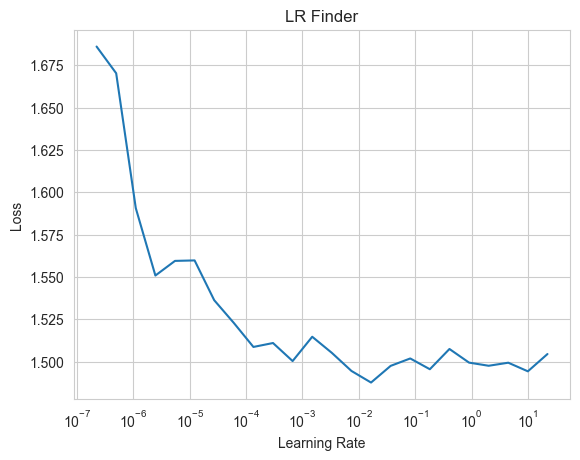

In [57]:
def find_lr(model, train_loader, loss_fn, optimizer_class=optim.Adam, 
            init_value=1e-7, final_value=10, beta=0.98):
    """Run a learning rate range test."""
    num = len(train_loader) - 1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer = optimizer_class(model.parameters(), lr=lr)
    
    avg_loss, best_loss = 0., float('inf')
    losses, log_lrs = [], []
    
    for batch_num, (inputs, targets) in enumerate(train_loader):
        # Move to GPU if available
        inputs, targets = inputs.to(next(model.parameters()).device), targets.to(next(model.parameters()).device)

        # Adjust learning rate
        lr *= mult
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # Compute smoothed loss
        avg_loss = beta * avg_loss + (1-beta) * loss.item()
        smoothed_loss = avg_loss / (1 - beta**(batch_num+1))
        
        # Record the lr and loss
        log_lrs.append(lr)
        losses.append(smoothed_loss)
        
        # Stop if the loss explodes
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            break
        
        # Update best loss
        if smoothed_loss < best_loss or batch_num == 0:
            best_loss = smoothed_loss

        # Backprop
        loss.backward()
        optimizer.step()
    
    # Plot
    plt.plot(log_lrs, losses)
    plt.xscale('log')
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("LR Finder")
    plt.show()

# --- Example usage ---
# Assume you already have:
#   train_loader = DataLoader(train_dataset, batch_size=...)
#   loss_fn = nn.CrossEntropyLoss()

find_lr(model, train_loader, criterion)

## Compile model

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
# optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)  # L2 regularization

## Train model

Model check point and early stop can code it in loop

In [ ]:
import time

start = time.time()

l1_lambda = 1e-4
l2_lambda = 1e-4

# Training loop
epochs = 50
for epoch in range(50):  # Train for 50 passes over the dataset
    model.train()  # 1️⃣ Put model in training mode (important for dropout/batchnorm)
    
    running_loss, correct = 0.0, 0  # Track total loss and correct predictions
    
    for inputs, labels in train_loader:  # 2️⃣ Iterate over mini-batches
        optimizer.zero_grad()            # 3️⃣ Reset gradients from previous step
        
        outputs = model(inputs)          # 4️⃣ Forward pass: compute model predictions
        loss = criterion(outputs, labels) # 5️⃣ Compute loss comparing predictions vs. true labels

        # L1 penalty
        l1_norm = sum(p.abs().sum() for p in model.parameters())

        # L2 penalty (manual way)
        l2_norm = sum(p.pow(2).sum() for p in model.parameters())

        # Add L1 and L2 penalties to the loss
        loss += l1_lambda * l1_norm + l2_lambda * l2_norm
        
        loss.backward()                  # 6️⃣ Backprop: compute gradients for all parameters
        optimizer.step()                  # 7️⃣ Update parameters using the optimizer
        
        running_loss += loss.item() * inputs.size(0)  # 8️⃣ Accumulate total loss
        preds = outputs.argmax(dim=1)    # 9️⃣ Get predicted class index per sample
        correct += (preds == labels).sum().item()  # 🔟 Count how many correct
    
    # After the epoch
    epoch_loss = running_loss / len(train_dataset)  # Average loss over all samples
    epoch_acc = correct / len(train_dataset)        # Accuracy over all samples
    
    print(f"Epoch {epoch+1:02d}: Loss={epoch_loss:.4f}, Acc={epoch_acc:.4f}")

end = time.time()

print(f'Time: {end-start:.3f} s')

Epoch 01: Loss=1.2290, Acc=0.6933
Epoch 02: Loss=1.0309, Acc=0.8893
Epoch 03: Loss=0.9872, Acc=0.9267
Epoch 04: Loss=0.9687, Acc=0.9427
Epoch 05: Loss=0.9696, Acc=0.9440
Epoch 06: Loss=0.9694, Acc=0.9427
Epoch 07: Loss=0.9648, Acc=0.9480
Epoch 08: Loss=0.9820, Acc=0.9267
Epoch 09: Loss=0.9681, Acc=0.9413
Epoch 10: Loss=0.9568, Acc=0.9480
Epoch 11: Loss=0.9510, Acc=0.9560
Epoch 12: Loss=0.9543, Acc=0.9533
Epoch 13: Loss=0.9553, Acc=0.9533
Epoch 14: Loss=0.9601, Acc=0.9440
Epoch 15: Loss=0.9588, Acc=0.9467
Epoch 16: Loss=0.9528, Acc=0.9587
Epoch 17: Loss=0.9578, Acc=0.9480
Epoch 18: Loss=0.9536, Acc=0.9507
Epoch 19: Loss=0.9570, Acc=0.9480
Epoch 20: Loss=0.9494, Acc=0.9573
Epoch 21: Loss=0.9499, Acc=0.9587
Epoch 22: Loss=0.9531, Acc=0.9507
Epoch 23: Loss=0.9553, Acc=0.9533
Epoch 24: Loss=0.9478, Acc=0.9600
Epoch 25: Loss=0.9496, Acc=0.9560
Epoch 26: Loss=0.9563, Acc=0.9440
Epoch 27: Loss=0.9627, Acc=0.9427
Epoch 28: Loss=0.9559, Acc=0.9467
Epoch 29: Loss=0.9646, Acc=0.9387
Epoch 30: Loss

## Evaluation

In [76]:
# 6. Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(test_loader.dataset[0])
print(model(test_loader.dataset[0][0].unsqueeze(0)).argmax(dim=1)[0].item())
print(f"Test Accuracy: {correct/total:.4f}")

(tensor([1.3084, 1.6820]), tensor(4))
4
Test Accuracy: 0.9640


## Create one-hot function

In [86]:
class Onehot2int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        if X is not torch.Tensor:
            X = torch.FloatTensor(X)
        y_pred = self.model(X).argmax(dim=1)[0].item()
        # Convert the predicted probabilities to one-hot encoding
        return y_pred
# Create an instance of the Onehot2int class
model_no_ohe = Onehot2int(model)


In [81]:
print("Prediction for the first sample in test_loader:")
print(test_loader.dataset[0])
print(model_no_ohe.predict(test_loader.dataset[0][0].unsqueeze(0)))

Prediction for the first sample in test_loader:
(tensor([1.3084, 1.6820]), tensor(4))
4


# Another way

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np

# --- 1. Generate Mock Data ---
num_samples = 100
num_features = 4
num_classes = 3
X_train_np = np.random.rand(num_samples, num_features).astype(np.float32)
y_train_np = np.random.randint(0, num_classes, size=(num_samples,), dtype=np.int64)

# Device setup (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert NumPy arrays to PyTorch Tensors and move to device
X_train = torch.from_numpy(X_train_np).to(device)
y_train = torch.from_numpy(y_train_np).to(device)

# --- 2. Define Model ---
model = nn.Sequential(
    nn.Linear(num_features, 64),
    nn.ReLU(),
    nn.Linear(64, num_classes),
    nn.Softmax(dim=1)
).to(device)   # move model to GPU

# --- 3. Loss & Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# --- 4. Training Setup ---
epochs = 100
batch_size = 8
validation_split = 0.25

# Validation split
val_size = int(num_samples * validation_split)
X_val = X_train[:val_size]
y_val = y_train[:val_size]
X_train = X_train[val_size:]
y_train = y_train[val_size:]

# --- 5. Training Loop ---
print("Starting training...")
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

        _, predicted = torch.max(val_outputs.data, 1)
        correct = (predicted == y_val).sum().item()
        val_accuracy = 100 * correct / val_size

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, "
          f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy:.2f}%")

print("Training complete!")
